In this first box what I'm doing is just importing the data for each of the refence stars and saving the JD, flux, and flux errors in the respective arrays. For each reference star the index corresponding to it in the array is just REF#-1 then, since the indices for the arrays start at 0.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

JDs = []
flux = []
flux_err = []

with open("SECTION_4_3/xo_2n.dat") as file:
    lines = file.readlines()
    column0 = []
    column1 = []
    column2 = []
    for x in lines:
        column0.append(float(x.split(' ')[0]))
        column1.append(float(x.split(' ')[1]))
        column2.append(float(x.split(' ')[2]))
    JDs.append(column0)
    flux.append(column1)
    flux_err.append(column2)

for i in range(1, 11):
    filename = "SECTION_4_3/ref" + str(i) + ".dat"
    with open(filename, 'r') as file:
        lines = file.readlines()
        column0 = []
        column1 = []
        column2 = []
        for x in lines:
            column0.append(float(x.split(' ')[0]))
            column1.append(float(x.split(' ')[1]))
            column2.append(float(x.split(' ')[2]))
        JDs.append(column0)
        flux.append(column1)
        flux_err.append(column2)
        
print(repr(fits.open('images/exposure_30sec.00000283.FIT')[0].header))

SIMPLE  =                    T/CCDSOFT-SOFTWARE BISQUE 3                        
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
BSCALE  = +1.000000000000E+000                                                  
BZERO   = +3.276800000000E+004                                                  
BIAS    =                  100                                                  
FOCALLEN= +0.000000000000E+000                                                  
APTAREA = +0.000000000000E+000                                                  
APTDIA  = +0.000000000000E+000                                                  
OBSERVER= 'Anja                '                                                
DATE-OBS= '2023-10-03T05:21:

In this box we're just eliminating the points in the data where no flux was recorded, and so the value for that value was replaced with a place holder of 0.001. So when we look at our data we run through the values and removed the flux, flux error, and JD associated with the exact 0.001 value.

In [46]:
JDs_no_0 = []
flux_no_0 = []
flux_err_no_0 = []
for i in range(0, 11):
    temp_JD = []
    temp_flux = []
    temp_flux_err = []
    for j in range(0, len(flux[i])):
        if flux[i][j] != 0.001 and flux[i][j] > 0.:
            temp_JD.append(JDs[i][j])
            temp_flux.append(flux[i][j])
            temp_flux_err.append(flux_err[i][j])
            
    JDs_no_0.append(temp_JD)
    flux_no_0.append(temp_flux)
    flux_err_no_0.append(temp_flux_err)
indix = 6
print(len(JDs_no_0[indix]), len(flux_no_0[indix]), len(flux_err_no_0[indix]))

353 353 353


Now that we have the data saved, we calculated the mean flux for each of the stars over the total observation period. We save this in `ave_flux` and then rescale the our flux and flux error by dividing by the each set of data by its respective average flux. We also do this for the data without the zeros, but we have to do it a little differently since all of the arrays don't necessarily have the same shape, and so there was a bit of issues with the list comprehension stuff. To work around this rather than using the `np.mean` function we did it manually.

In [47]:
ave_flux = [sum(flux[x]) / len(flux[x]) for x in range(0, 11)]
scaled_flux = [np.asarray(flux[x]) / ave_flux[x] for x in range(0, len(ave_flux))]
scaled_flux_err = [np.asarray(flux_err[x]) / ave_flux[x] for x in range(0, len(ave_flux))]

ave_flux_no_0 = [sum(flux_no_0[x]) / len(flux_no_0[x]) for x in range(0, 11)]
scaled_flux_no_0 = [np.asarray(flux_no_0[x]) / ave_flux_no_0[x] for x in range(0, len(ave_flux_no_0))]
scaled_flux_err_no_0 = [np.asarray(flux_err_no_0[x]) / ave_flux_no_0[x] for x in range(0, len(ave_flux_no_0))]

Here I am plotting each lightcurve separately so that we can analyze each one. We plot it here with the errorbars to see if any of the stars have more than random variability to them as well. From the look of the curves they all seem to follow the same pattern, having a lot of the same peaks and dips due to the clouds. Once we have scaled the fluxes we see they tend to have the around the same values as well. Some of the curves have a big dip into a negative value which is not expected.

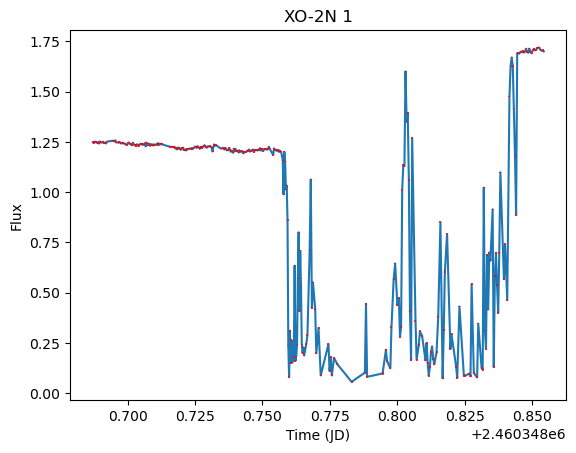

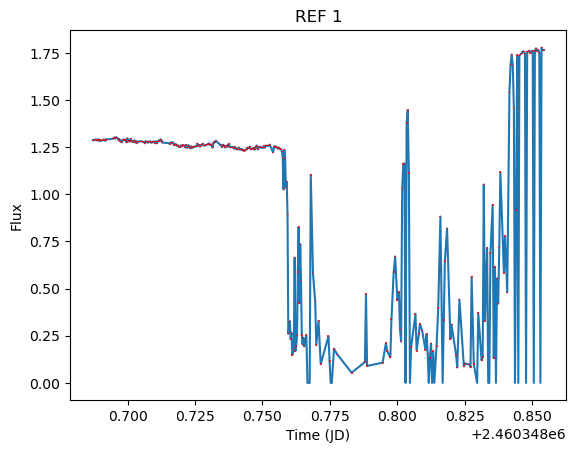

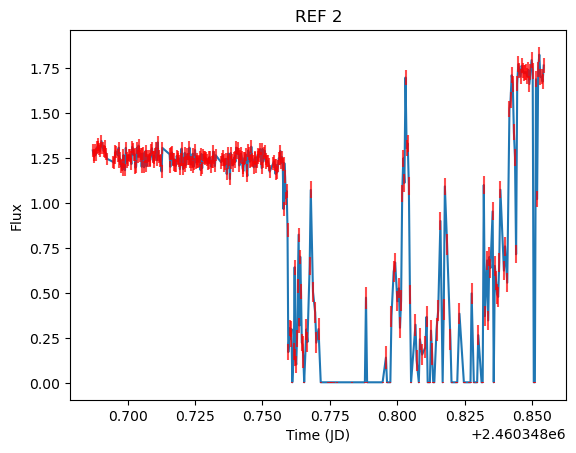

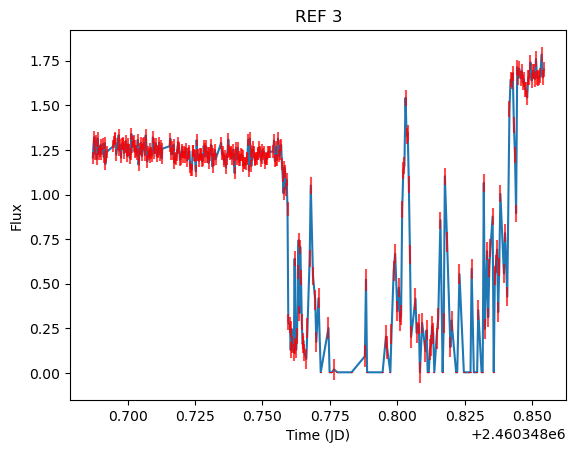

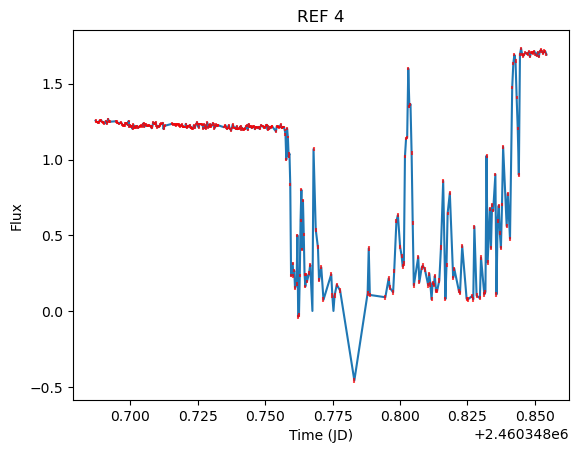

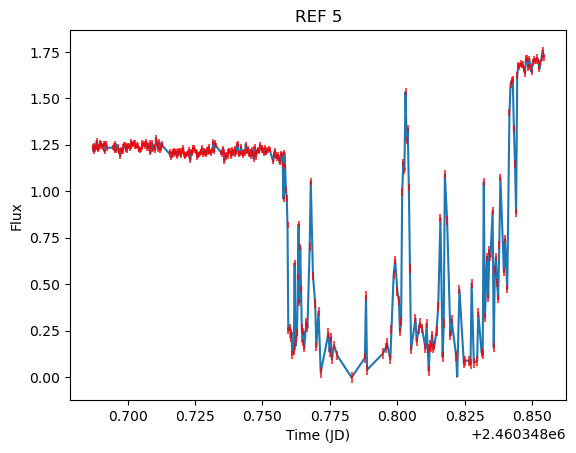

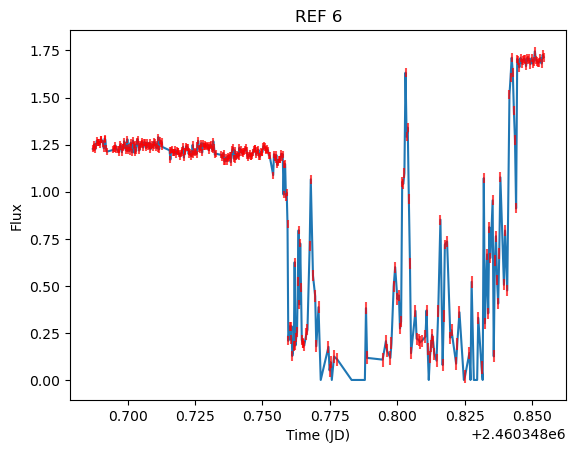

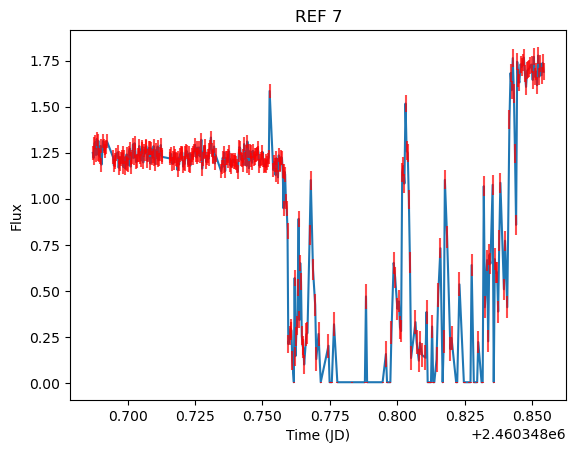

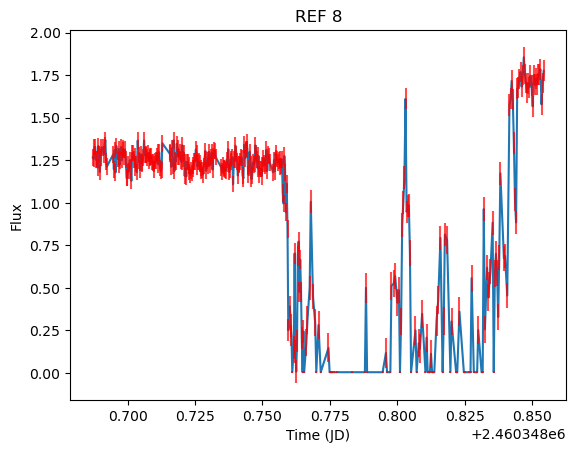

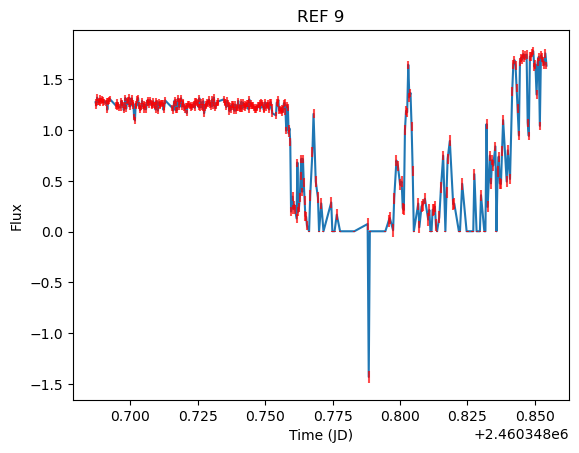

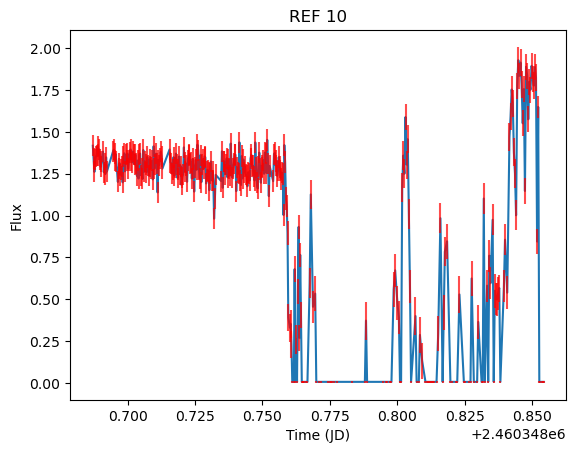

In [48]:
for i in range(0, 11):
#     plt.figure(figsize=(20, 10))
    plt.xlabel('Time (JD)')
    plt.plot(JDs[i],scaled_flux[i])
    plt.errorbar(JDs[i], scaled_flux[i], yerr=scaled_flux_err[i], linestyle='', color='r', alpha=0.7)
    plt.ylabel('Flux')
    if i == 0:
        plt.title("XO-2N 1")
    else:
        plt.title(rf'REF {i}')
    plt.show()

Here I'm plotting the first five reference stars together and then the next 5 reference stars together, sepearating each of them by a step in the flux by 0.15 so that we can see each of them separately. Now it's really plain to see how the lightcurves all look similar and have similar peaks and dips due to the appearance of clouds.

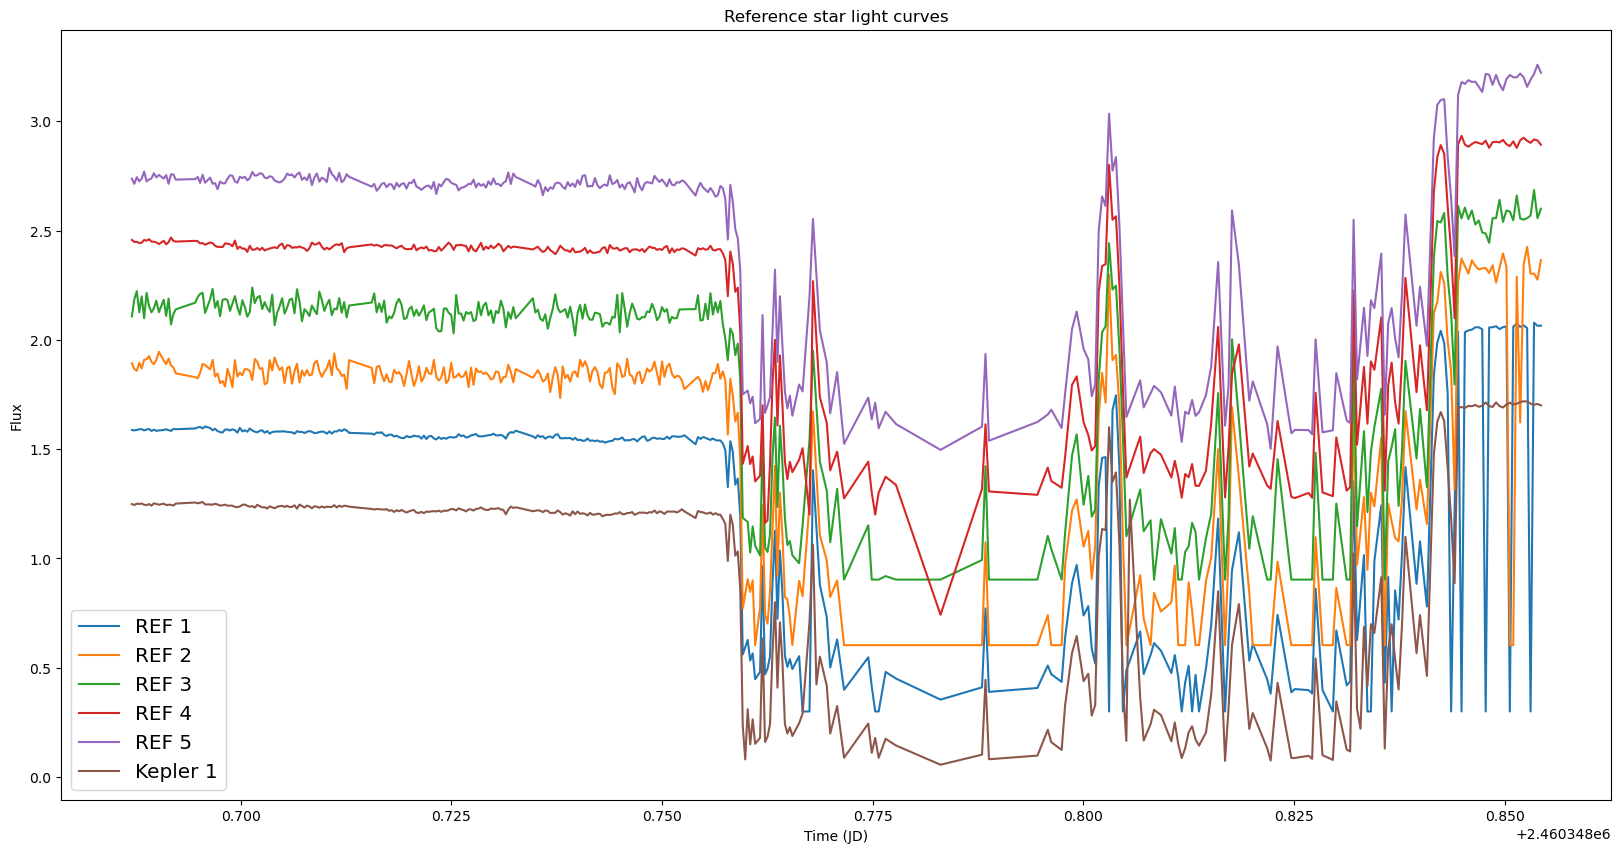

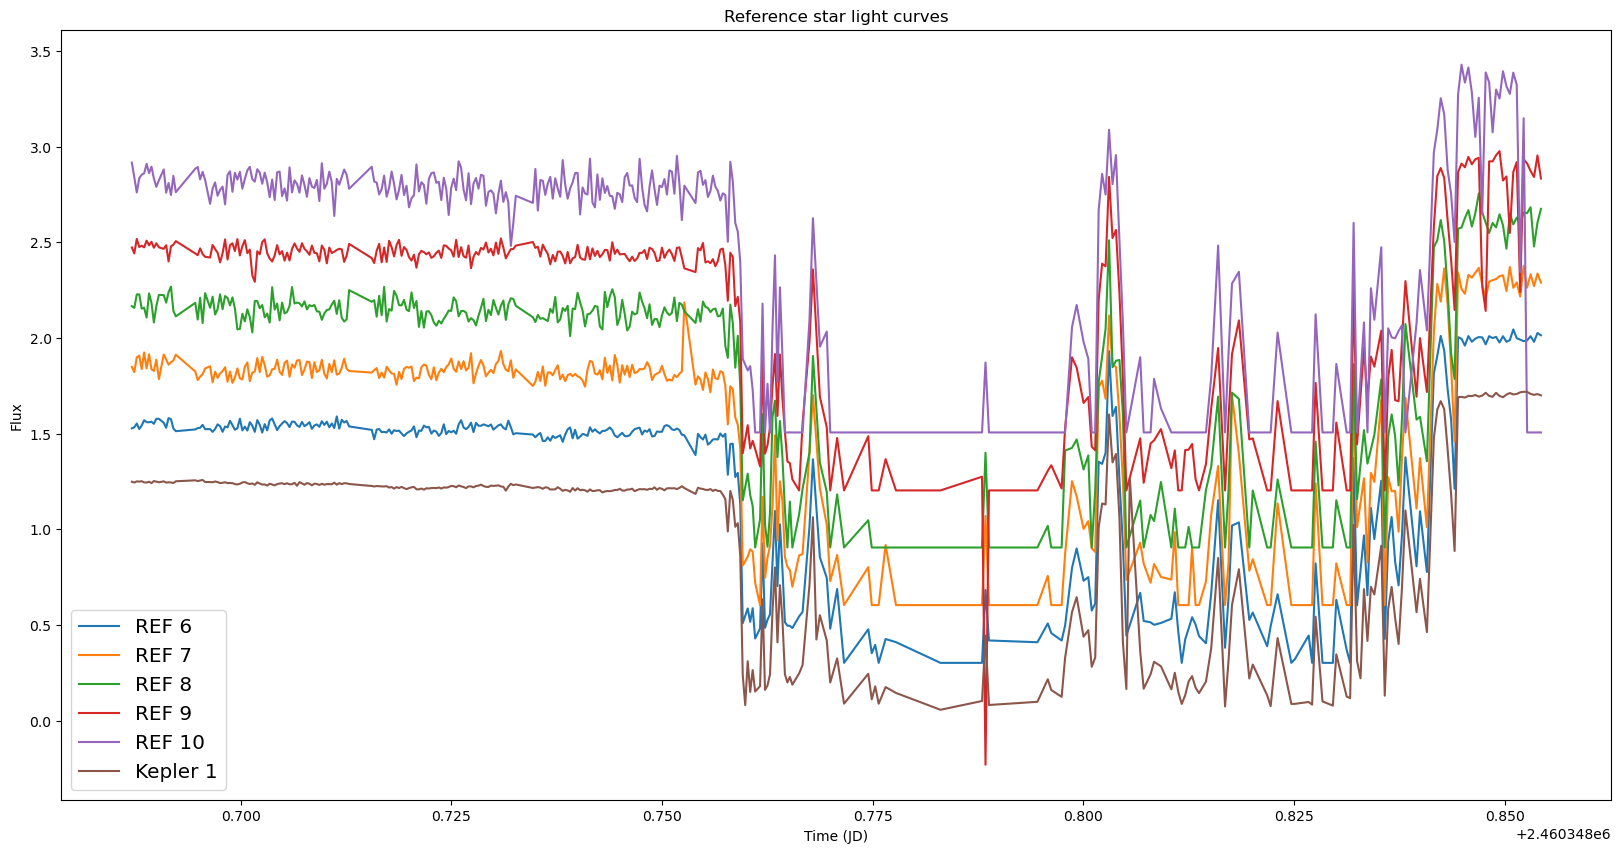

In [49]:
#This is just to stack the plots together
step = 0.3
for i in [0, 5]:
    scaled_flux[i+1] += step
    scaled_flux[i+2] += 2*step
    scaled_flux[i+3] += 3*step
    scaled_flux[i+4] += 4*step
    scaled_flux[i+5] += 5*step
    
for j in [0, 5]:
    plt.figure(figsize=(20, 10))
    for i in range(1, 6):
        i += j
        plt.xlabel('Time (JD)')
        plt.plot(JDs[i],scaled_flux[i], label=rf"REF {i}")
        plt.ylabel('Flux')
        plt.title(rf'Reference star light curves')
    plt.plot(JDs[0],scaled_flux[0], label="Kepler 1")
    plt.legend(fontsize='x-large')
    plt.show()

Here we are plotting the lightcurve for each reference star individually again, but now we see how removing the data where the flux wasn't calculated property cleaned up the light curves a little more.

367 367


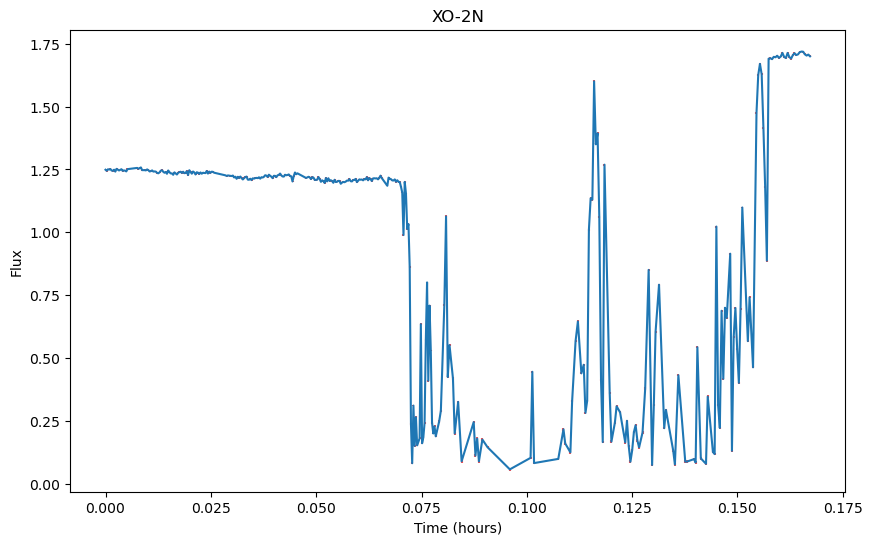

344 344


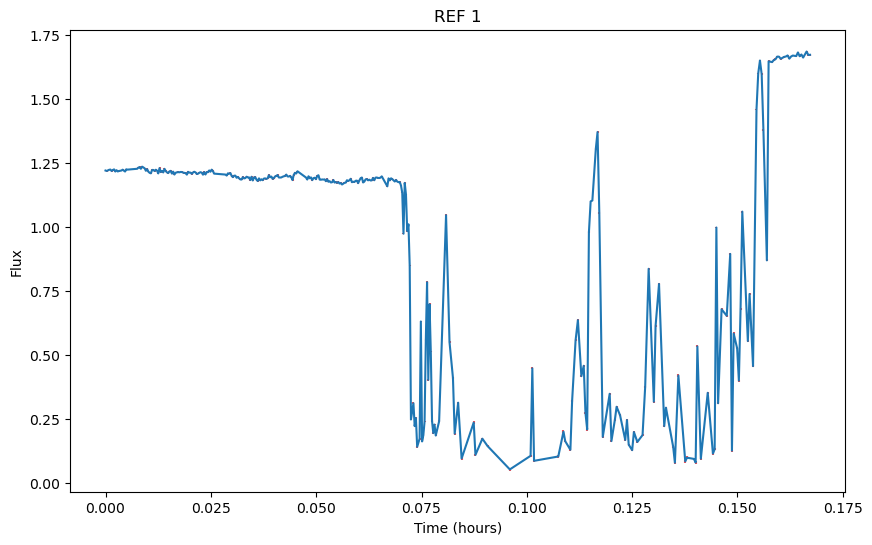

326 326


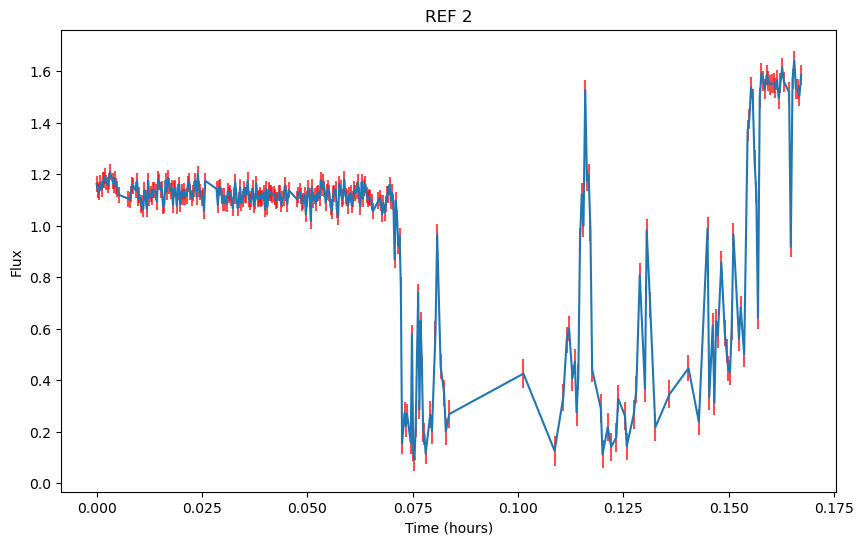

339 339


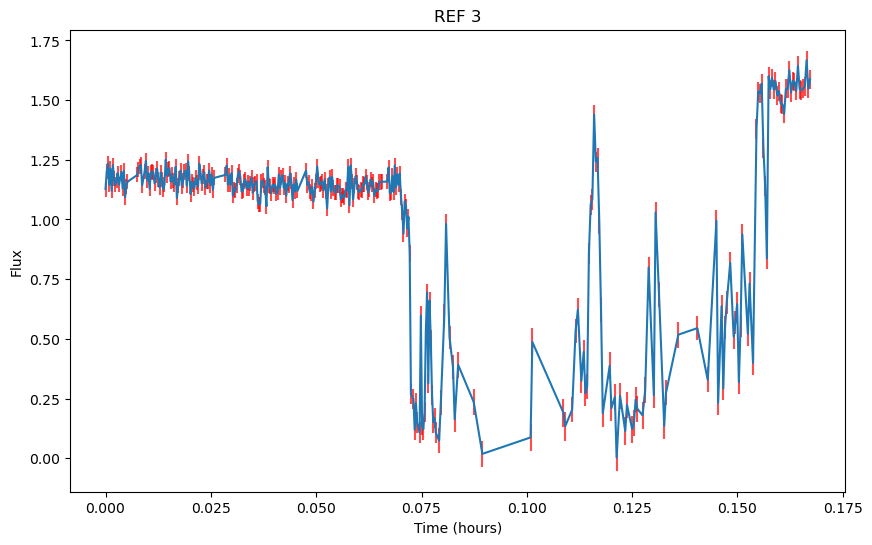

358 358


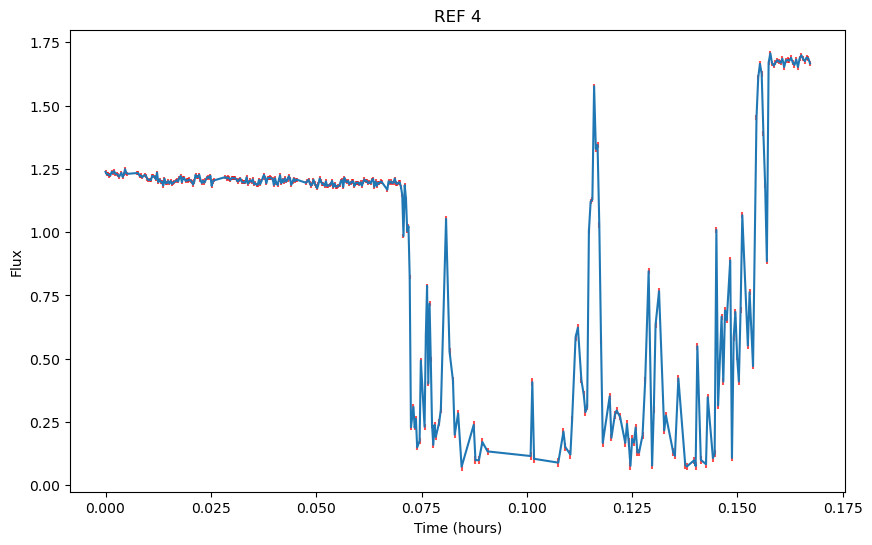

361 361


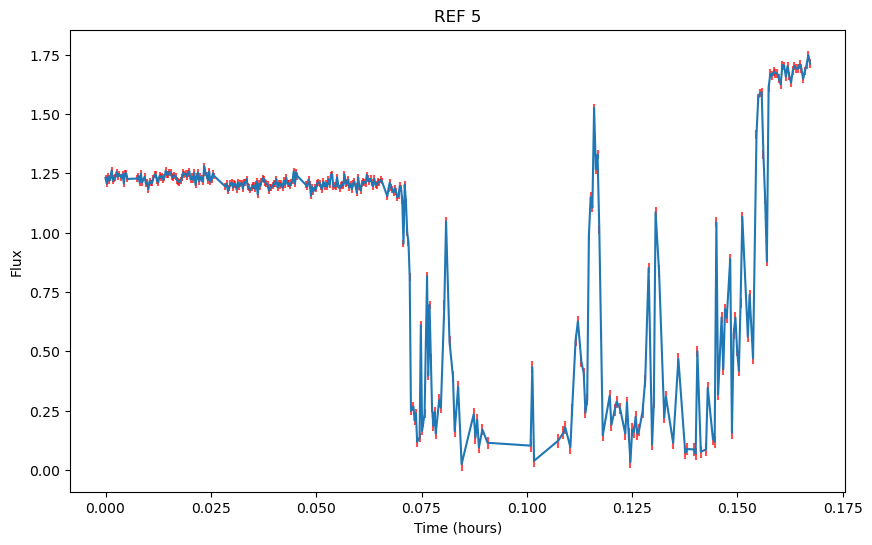

353 353


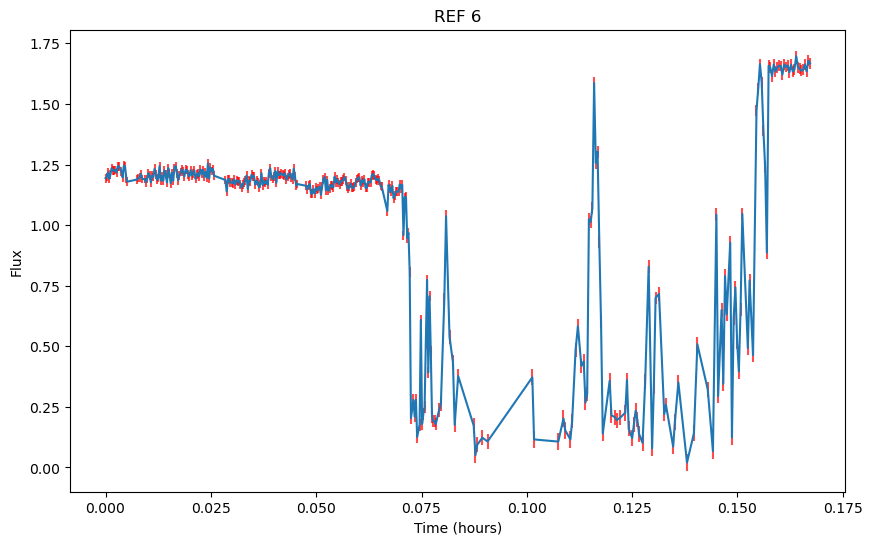

333 333


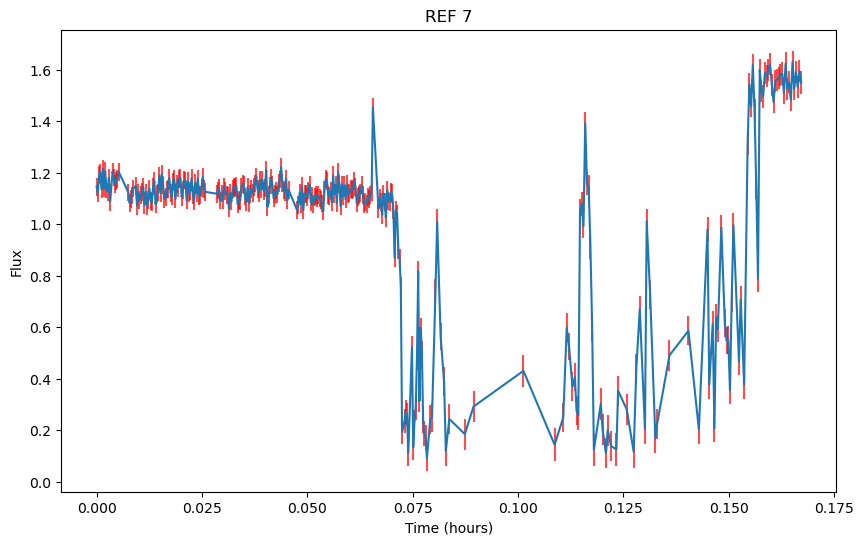

324 324


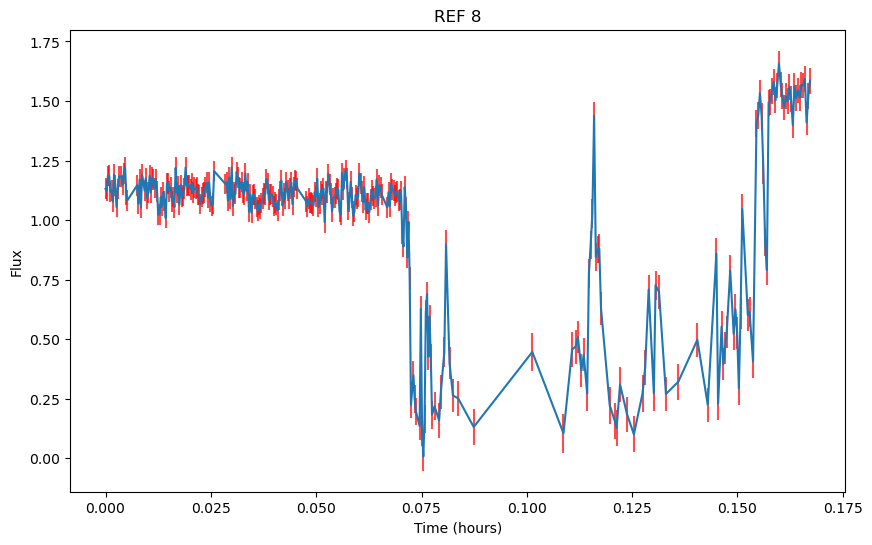

336 336


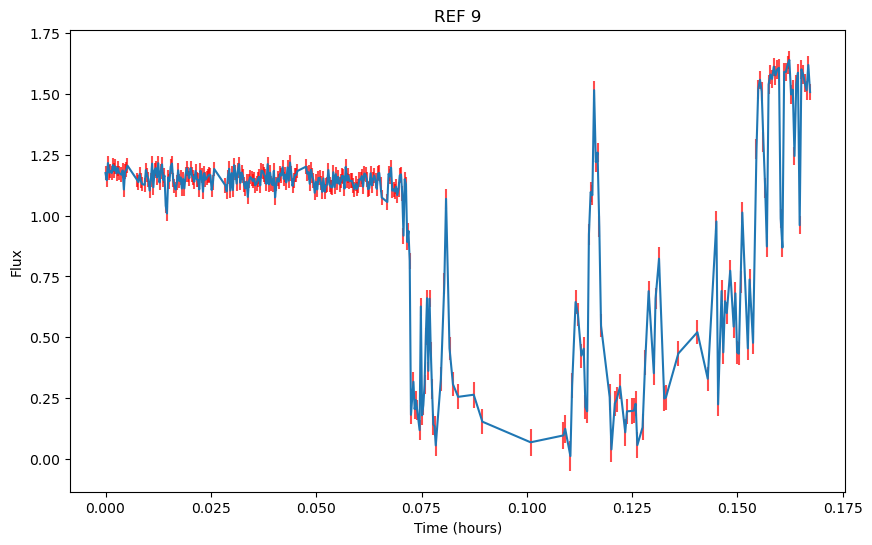

299 299


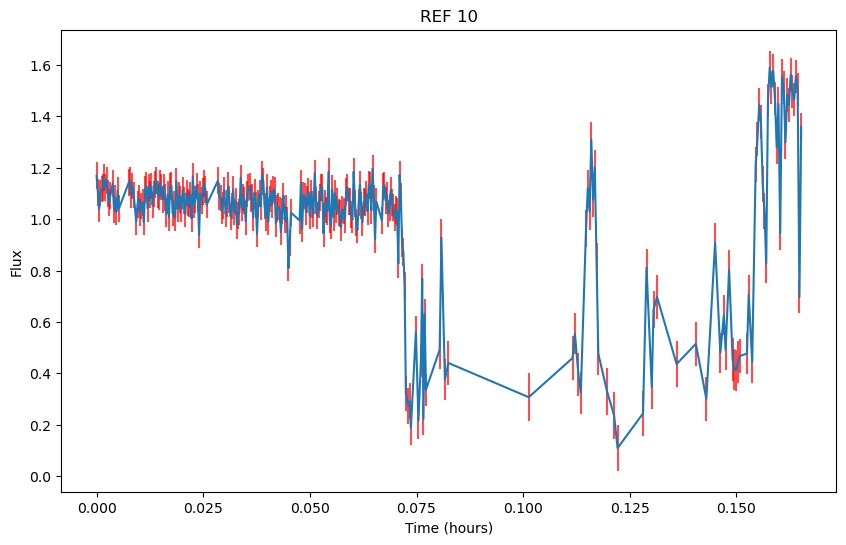

In [50]:
for i in range(0, 11):
    times = np.asarray(JDs_no_0[i]) - JDs_no_0[0][0]
    print(len(times), len(scaled_flux_err_no_0[i]))
    plt.figure(figsize=(10, 6))
    plt.xlabel('Time (hours)')
    plt.errorbar(times, scaled_flux_no_0[i], yerr=scaled_flux_err_no_0[i], linestyle='', color='r', alpha=0.7)
    plt.plot(times,scaled_flux_no_0[i])
    plt.ylabel('Flux')
    if i == 0:
        plt.title("XO-2N")
    else:
        plt.title(rf'REF {i}')
    plt.show()


Here were comparing the lightcurves again after we have cleaned up the data, and we see that once again the data looks cleaned up. Similar to before we can see how alike the lightcurves are with a lot of corresponding peaks and dips.

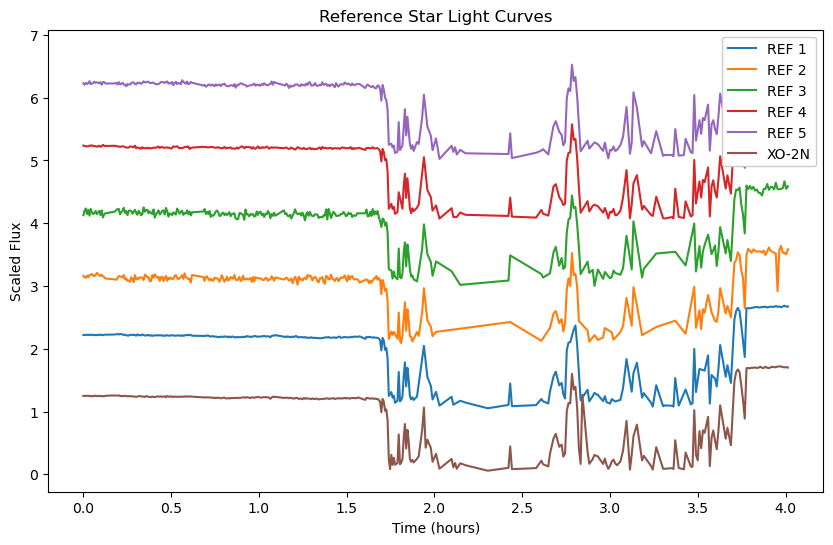

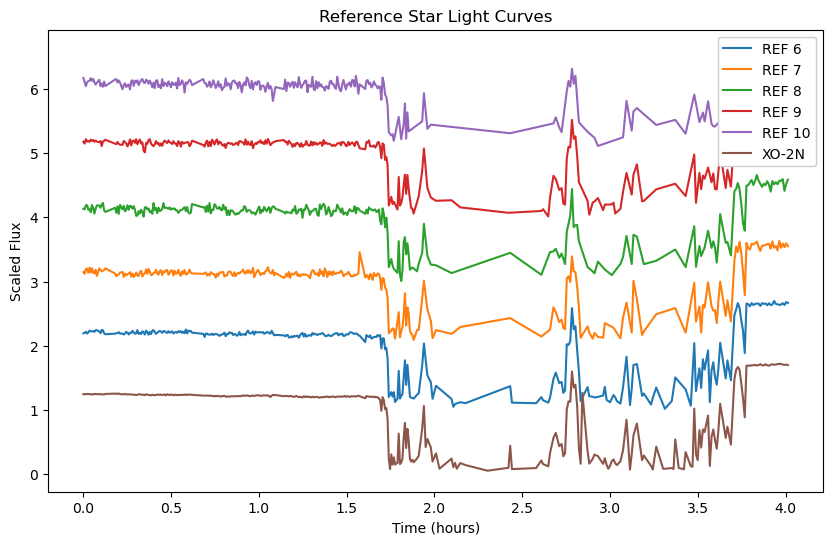

In [51]:
#This is just to stack the plots together
step = 1.0
for i in [0, 5]:
    scaled_flux_no_0[i+1] += step
    scaled_flux_no_0[i+2] += 2*step
    scaled_flux_no_0[i+3] += 3*step
    scaled_flux_no_0[i+4] += 4*step
    scaled_flux_no_0[i+5] += 5*step
    
for j in [0, 5]:
    plt.figure(figsize=(10, 6))
    for i in range(1, 6):
        i += j
        times = (np.asarray(JDs_no_0[i]) - JDs_no_0[i][0])*24
        plt.xlabel('Time (hours)')
        plt.plot(times, scaled_flux_no_0[i], label=rf"REF {i}")
        plt.ylabel('Scaled Flux')
        plt.title(rf'Reference Star Light Curves')
    plt.plot((np.asarray(JDs_no_0[0])-JDs_no_0[0][0])*24, scaled_flux_no_0[0], label="XO-2N")
    plt.legend(loc='upper right', framealpha=1)
    plt.show()
    